# Vision models for image interpretation
Some models support image input and can interpret the images. This might be useful to guide the large language model when deciding what to do with the image.

In [1]:
from bia_bob import bob
bob.__version__

'0.14.0'

First, we load an example image.

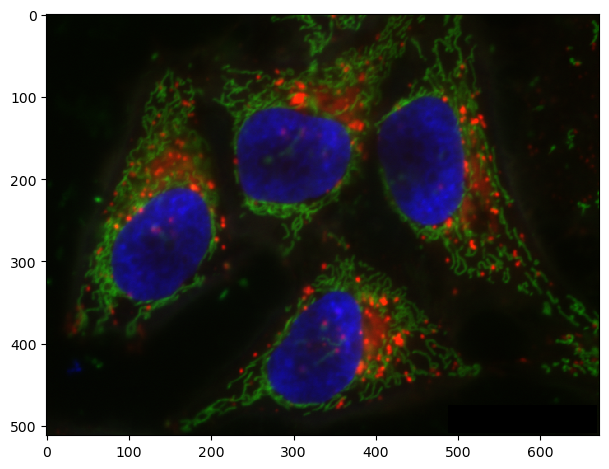

In [2]:
from skimage.io import imread, imshow
image = imread("hela-cells-8bit.tif")

imshow(image)

Per default, Bob uses the model `gpt-4o` which has vision capabilities.

In [3]:
%%bob image
what's in this microscopy image? Answer in one short sentence.

The microscopy image shows four cells with blue-stained nuclei, surrounded by green-stained structures and red-stained subcellular components.

This serves as as sanity check if the information about the image content has been stored in memory.

In [4]:
%bob what's again in this image ?

The microscopy image shows four cells with blue-stained nuclei, surrounded by green-stained structures and red-stained subcellular components.

In [5]:
%bob how could I segment the nuclei ?

I will segment the blue-stained nuclei from the microscopy image using color thresholding techniques.



StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
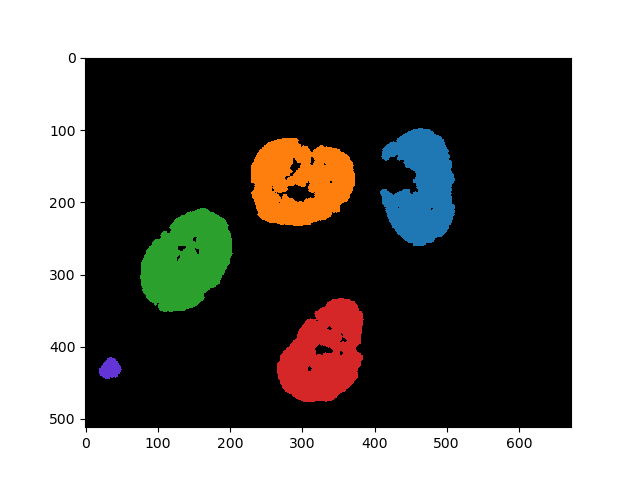

In [6]:
from skimage.io import imread
from skimage.color import rgb2hsv
from skimage import morphology, measure
import numpy as np

# Load the image
#image = imread('path_to_your_image')

# Convert RGB image to HSV
hsv_image = rgb2hsv(image)

# Isolate the blue channel in HSV. Typically, blue has a hue range of around 0.5 to 0.7
blue_mask = np.logical_and(hsv_image[:, :, 0] >= 0.5, hsv_image[:, :, 0] <= 0.7)

# Apply morphological operations to clean segmentation
blue_mask = morphology.remove_small_objects(blue_mask, min_size=50)
blue_mask = morphology.remove_small_holes(blue_mask, area_threshold=64)
blue_mask = morphology.dilation(blue_mask, morphology.disk(3))

# Label connected components
labeled_nuclei = measure.label(blue_mask)

# Show the result using stackview
import stackview
stackview.insight(labeled_nuclei)